# Importar librerias

In [1]:
import pandas as pd
import sidetable as stb
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler

# Carga de datos

In [2]:
print("-------------------------------Cargando dataset--------------------------------")
df = pd.read_excel("../Data/creditcardmarketing.xlsx", index_col= 0)

-------------------------------Cargando dataset--------------------------------


In [3]:
df.head(3)

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
Customer Number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0


# Análisis exploratorio, EDA

In [4]:
df.columns

Index(['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level',
       '# Bank Accounts Open', 'Overdraft Protection', 'Credit Rating',
       '# Credit Cards Held', '# Homes Owned', 'Household Size',
       'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance',
       'Q3 Balance', 'Q4 Balance'],
      dtype='object')

In [5]:
print("Filas del dataset:", df.shape[0])
print("Columnas del dataset:", df.shape[1])

Filas del dataset: 18000
Columnas del dataset: 16


In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [8]:
df.stb.missing()

,missing,total,percent
Average Balance,24,18000,0.133333
Q1 Balance,24,18000,0.133333
Q2 Balance,24,18000,0.133333
Q3 Balance,24,18000,0.133333
Q4 Balance,24,18000,0.133333
Offer Accepted,0,18000,0.000000
Reward,0,18000,0.000000
Mailer Type,0,18000,0.000000
Income Level,0,18000,0.000000
# Bank Accounts Open,0,18000,0.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
# Bank Accounts Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
# Credit Cards Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
# Homes Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Average Balance,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Q1 Balance,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Q2 Balance,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Q3 Balance,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Q4 Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


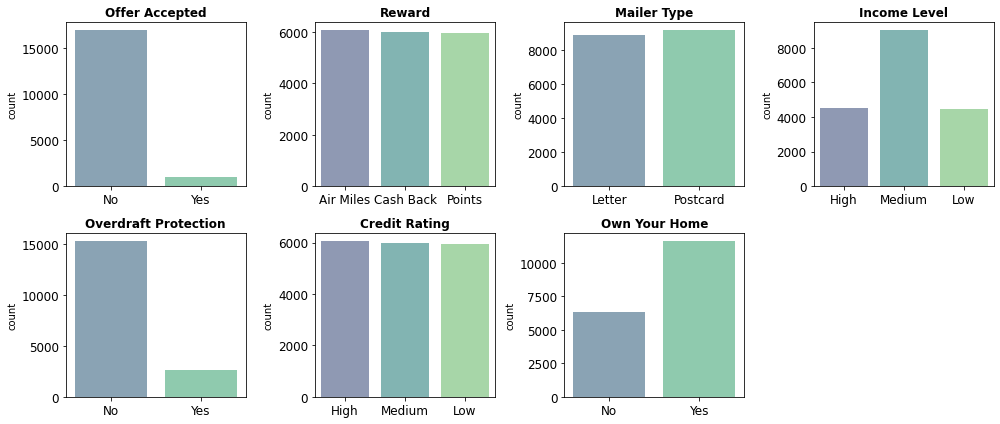

In [10]:
str_cols = df.select_dtypes('object').columns

fig, ax = plt.subplots( 2, 4, figsize=(14, 6))
ax = ax.flat

for i in range(len(str_cols)): 
    sns.countplot(data = df, x = str_cols[i], alpha = 0.6,palette = "viridis", ax = ax[i])
    
    
    ax[i].set_title(str_cols[i], fontsize = 12, fontweight = "bold")
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("")

fig.delaxes(ax[-1])
fig.tight_layout();

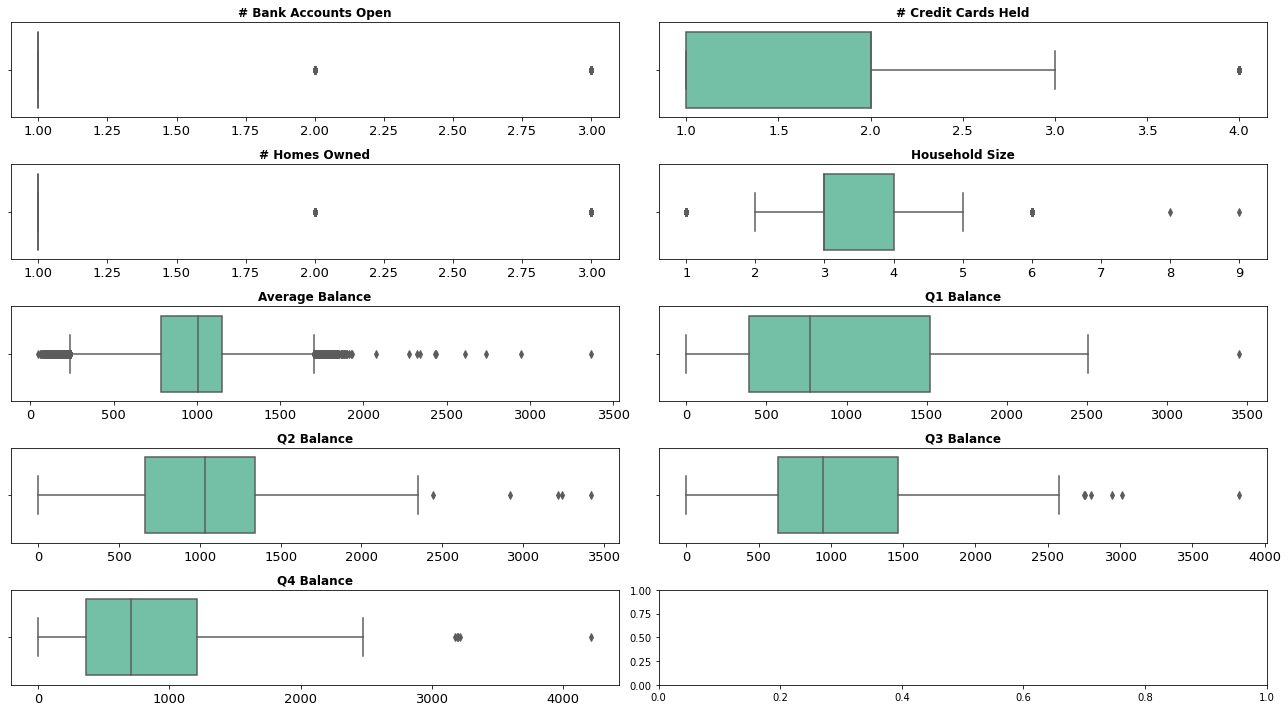

In [11]:
num_cols = df.select_dtypes(np.number).columns

fig, axes = plt.subplots( 5, 2, figsize=(18, 10))
axes = axes.flat

for i in range(len(num_cols)): 
    sns.boxplot(data = df, x = num_cols[i], color= 'mediumaquamarine', ax= axes[i]).set_title(num_cols[i], fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 13)
    axes[i].set_xlabel("")

fig.tight_layout();

# Limpieza preliminar

In [12]:
df.columns = df.columns.str.lower().str.replace("#"," ").str.strip().str.replace(" ","_")
print("Modificamos el nombre de las columnas para que pueda ser más intuitivo su uso durante el proceso de limpieza y modelado")

Modificamos el nombre de las columnas para que pueda ser más intuitivo su uso durante el proceso de limpieza y modelado


In [13]:
values_nans = df[df.isnull().any(axis=1)]
display(values_nans.head(2))
percen_nans = values_nans.shape[0] / df.shape[0] * 100
print(percen_nans)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
Customer Number,,,,,,,,,,,,,,,,
324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN


0.13333333333333333


Todas las filas que contienen valores nulos estan concentradas en las columnas sobre el salario del cliente. Una vez analizadas las 24 filas que contienen nans procedemos a eliminarlas, no llegan ni al 1% del dataset.

# Análisis Preprocesado

### Variable respuesta

No     0.943167
Yes    0.056833
Name: offer_accepted, dtype: float64

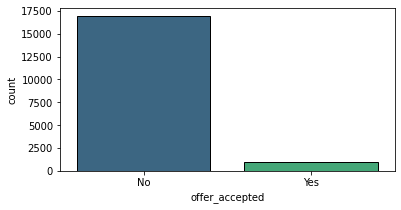

In [14]:
plt.figure(figsize=(6,3))

sns.countplot(data = df, x = "offer_accepted",  palette = "viridis",  edgecolor='black');

df['offer_accepted'].value_counts() / df.shape[0]

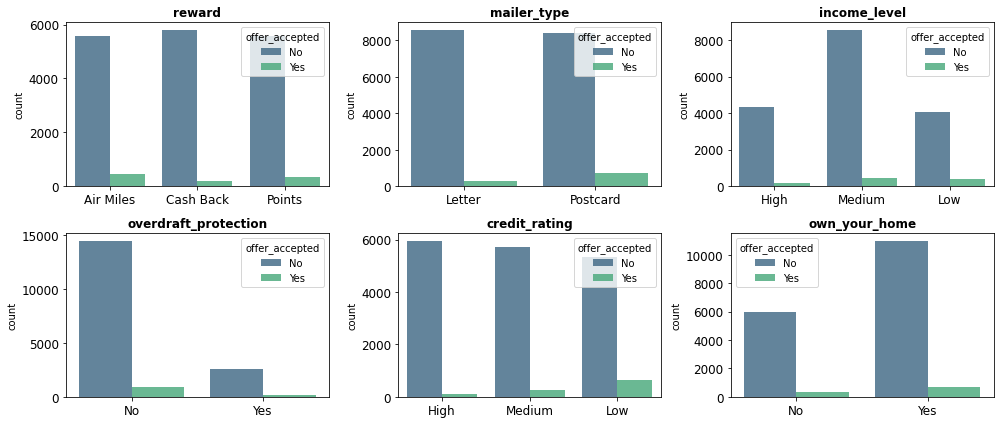

In [15]:
str_cols2 = df.select_dtypes('object').columns.drop("offer_accepted")

fig, ax = plt.subplots( 2, 3, figsize=(14, 6))
ax = ax.flat

for i in range(len(str_cols2)): 
    sns.countplot(data = df, x = str_cols2[i], alpha = 0.8,hue= 'offer_accepted', palette = "viridis",ax = ax[i])
    
    
    ax[i].set_title(str_cols2[i], fontsize = 12, fontweight = "bold")
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("")

fig.tight_layout();

In [16]:
df.stb.freq(['credit_rating', 'offer_accepted'])

,credit_rating,offer_accepted,count,percent,cumulative_count,cumulative_percent
0,High,No,5952,33.066667,5952,33.066667
1,Medium,No,5701,31.672222,11653,64.738889
2,Low,No,5324,29.577778,16977,94.316667
3,Low,Yes,633,3.516667,17610,97.833333
4,Medium,Yes,271,1.505556,17881,99.338889
5,High,Yes,119,0.661111,18000,100.000000


In [17]:
df.stb.freq(['income_level', 'offer_accepted'])

,income_level,offer_accepted,count,percent,cumulative_count,cumulative_percent
0,Medium,No,8543,47.461111,8543,47.461111
1,High,No,4361,24.227778,12904,71.688889
2,Low,No,4073,22.627778,16977,94.316667
3,Medium,Yes,470,2.611111,17447,96.927778
4,Low,Yes,388,2.155556,17835,99.083333
5,High,Yes,165,0.916667,18000,100.000000


In [18]:
df.stb.freq(['mailer_type', 'offer_accepted'])

,mailer_type,offer_accepted,count,percent,cumulative_count,cumulative_percent
0,Letter,No,8553,47.516667,8553,47.516667
1,Postcard,No,8424,46.800000,16977,94.316667
2,Postcard,Yes,723,4.016667,17700,98.333333
3,Letter,Yes,300,1.666667,18000,100.000000


**Resumen**

Las principales conclusiones del análisis de variables categóricas son:

- Los clientes que aceptan la tarjeta de credito tienen una clasificación creditiva baja.
- Prefieren recibirla via postal.
- En la mayoria de los casos, el nivel de ingresos de los clientes que aceptan la tarjeta de credito tienen un nivel de ingresos medio-bajo.

### Variables numéricas

In [19]:
df_yes = df[df['offer_accepted'] == 'Yes']
df_no = df[df['offer_accepted'] == 'No']
print("---  Resumen estadístico sobre los clientes que si aceptaron la oferta  ---")
display(df_yes.describe().T)
print("---  Resumen estadístico sobre los clientes que NO aceptaron la oferta  ---")
display(df_no.describe().T)

---  Resumen estadístico sobre los clientes que si aceptaron la oferta  ---


,count,mean,std,min,25%,50%,75%,max
bank_accounts_open,1023.0,1.254154,0.463881,1.00,1.0,1.0,1.0,3.00
credit_cards_held,1023.0,1.896383,0.806661,1.00,1.0,2.0,2.0,4.00
homes_owned,1023.0,1.202346,0.423288,1.00,1.0,1.0,1.0,3.00
household_size,1023.0,3.440860,1.125306,1.00,3.0,3.0,4.0,9.00
average_balance,1021.0,934.980167,348.586313,75.75,800.5,1008.5,1151.0,1879.25
q1_balance,1021.0,868.670911,621.091927,2.00,359.0,721.0,1479.0,2189.00
q2_balance,1021.0,998.813908,463.188441,8.00,652.0,1051.0,1347.0,1995.00
q3_balance,1021.0,1060.929481,567.424601,11.00,630.0,964.0,1527.0,2292.00
q4_balance,1021.0,811.506366,548.032407,4.00,389.0,703.0,1198.0,2197.00


---  Resumen estadístico sobre los clientes que NO aceptaron la oferta  ---


,count,mean,std,min,25%,50%,75%,max
bank_accounts_open,16977.0,1.255876,0.473028,1.00,1.0,1.0,1.000,3.00
credit_cards_held,16977.0,1.903929,0.796445,1.00,1.0,2.0,2.000,4.00
homes_owned,16977.0,1.203511,0.427596,1.00,1.0,1.0,1.000,3.00
household_size,16977.0,3.502562,1.113444,1.00,3.0,3.0,4.000,8.00
average_balance,16955.0,940.848894,350.408076,48.25,787.0,1007.0,1153.375,3366.25
q1_balance,16955.0,912.966559,619.944358,0.00,396.0,774.0,1525.000,3450.00
q2_balance,16955.0,999.427013,457.065296,0.00,664.0,1031.0,1342.000,3421.00
q3_balance,16955.0,1040.895724,552.596459,0.00,633.0,945.0,1458.000,3823.00
q4_balance,16955.0,810.106281,559.670799,0.00,362.0,703.0,1213.000,4215.00


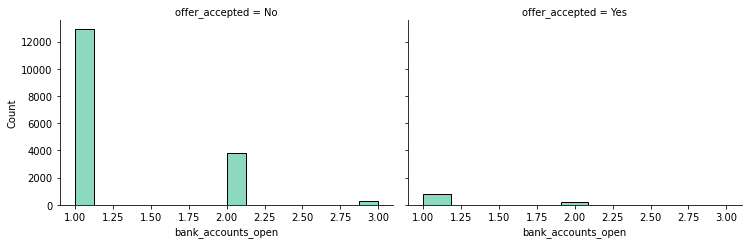

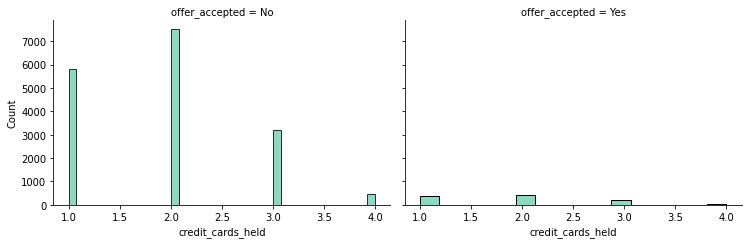

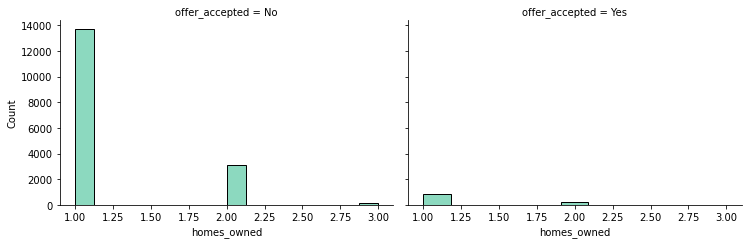

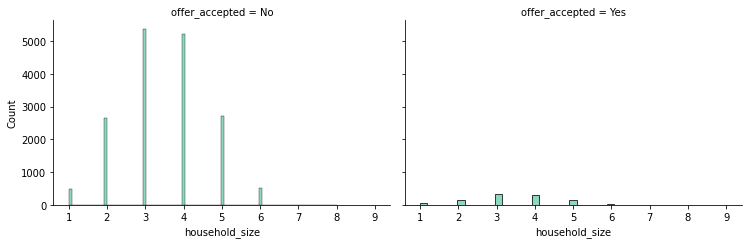

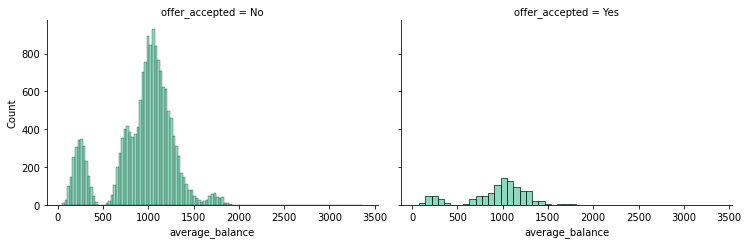

In [20]:
num_cols = df.select_dtypes(np.number).columns.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'])


for i in range(len(num_cols)):
    graf = sns.FacetGrid(df, col="offer_accepted", height=3.5, aspect=1.5)
    graf.map(sns.histplot, num_cols[i], color= 'mediumaquamarine')
    
plt.show;

Antes de realizar la codificación de las variables categóricas, revisamos la relación entre las variables numéricas.

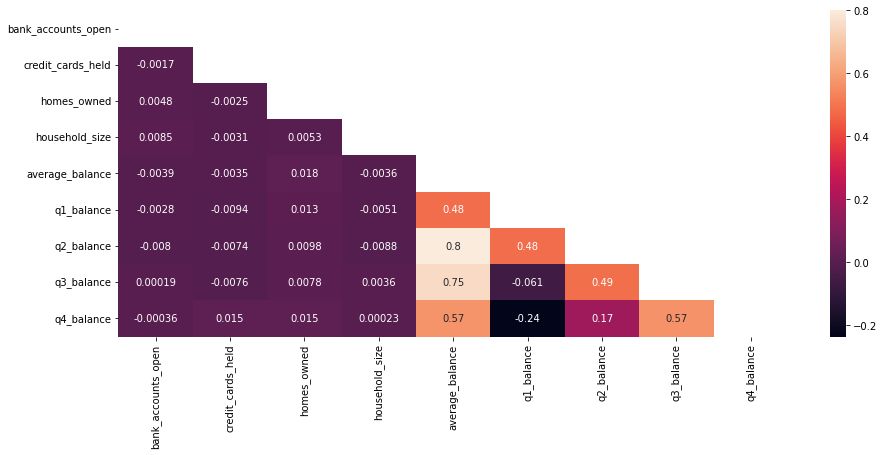

In [21]:
plt.figure(figsize=(15,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot = True, mask = mask); #barra lateral

In [22]:
df.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'], axis=1, inplace= True)

**Resumen del análisis de las variables numéricas**

Estas son las principales conclusiones extraídas:

- La distribución de las variables continuas guardan relación entre los clientes que aceptaron y los que no, la tarjeta de crédito.
- El 75% de los clientes disponen una única cuenta abierta y una casa en propiedad. Dado que es un número muy elevado de casos, hacer una oferta especial a este tipo de cliente posiblemente aumentaría las adquisiciones de tarjetas de crédito.
- En la mayoría de los casos, tanto si aceptaron o no la oferta, los clientes no disponen de un sueldo superior a 1153$.

# Preprocesamiento

## Outliers

In [23]:
df = df[df['average_balance'] <= np.nanpercentile(df['average_balance'], 75)]
df = df[df['household_size'] <= np.nanpercentile(df['household_size'], 75)]
df['offer_accepted'].value_counts()[1] / df['offer_accepted'].value_counts()[0] * 100     # % de personas que aceptaron la oferta

6.173078786704138

Desestimamos a los clientes que tienen un saldo en la cuenta superior al Q3, debido a que aun desestimándolos mantenemos la proporción entre clientes que aceptaron o no la oferta. Lo mismo ocurre con el numero de personas que hay en la familia.

# Estandarización

In [24]:
num_col = df.select_dtypes(include=np.number).columns

scaler = StandardScaler()
scaler.fit(df[num_col])
X_escaladas = scaler.transform(df[num_col])
df[num_col] = X_escaladas
df.head(2)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance
Customer Number,,,,,,,,,,,,
3,No,Air Miles,Postcard,High,1.58558,No,Medium,0.123321,-0.465955,-1.328969,Yes,-1.790385
6,No,Air Miles,Letter,Medium,-0.54643,No,High,1.382507,-0.465955,1.061670,No,0.988301


# Codificación  

In [25]:
df['offer_accepted'] = df['offer_accepted'].replace('Yes', 1).replace('No', 0)

def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    return df

#orden_mailer = ['Letter', 'Postcard']
orden_income = ['Low', 'High', 'Medium']
orden_protection = ['Yes', 'No']
orden_home = ['No', 'Yes']

# df = ordinal_encoder(orden_mailer, df, )
df = ordinal_encoder(orden_income, df, "income_level")
df = ordinal_encoder(orden_protection, df, "overdraft_protection")
df = ordinal_encoder(orden_home, df, "own_your_home")

names_col = ['reward', 'credit_rating', 'mailer_type']

for col in names_col:
    dummies = pd.get_dummies(df[col], prefix_sep = "_", prefix = col, dtype = int)
    df = pd.concat([dummies, df], axis = 1)
    
df.drop(names_col, axis = 1, inplace = True)

# Ajuste de modelo 

In [26]:
# dividimos el dataset en variables predictoras y respuesta
X = df.drop('offer_accepted', axis = 1) # variables predictoras
y = df["offer_accepted"] # variable respuesta 

In [27]:
# iniciamos el método
down = RandomUnderSampler()

# ajustamos el modelo
X_down, y_down = down.fit_resample(X,y)

y_down.value_counts()

0    637
1    637
Name: offer_accepted, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size = 0.2, random_state = 25)

In [29]:
y_train.describe()

count    1019.000000
mean        0.501472
std         0.500243
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: offer_accepted, dtype: float64

In [30]:
y_test.describe()

count    255.000000
mean       0.494118
std        0.500949
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: offer_accepted, dtype: float64

## Logistic Regression

In [31]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [32]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [33]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
    mat_lr = confusion_matrix(clases_reales, clases_predichas)

    df = pd.DataFrame(mat_lr, columns = ["No", "Si"], index = ["No", "Si"])
    df = ((df / total_filas_test) * 100).round(2)
    return df

matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

,No,Si
No,33.33,17.25
Si,14.51,34.90


In [34]:
accuracy = accuracy_score(y_test, y_pred_lr_test)
accuracy

0.6823529411764706

## Decision Tree Classifier

In [46]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
# max features
max_features = np.sqrt(len(X_train.columns))
max_features

4.0

In [48]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [49]:
# veamos cual es la profundidad de nuestro árbol
print(arbol.tree_.max_depth)

19


In [50]:
param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
         "min_samples_split": [25, 50, 75, 100],
         "max_features": [1,2,3,4]}

arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        verbose = 3, 
        cv = 15, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error",
        n_jobs= -1)

In [51]:
arbol2.fit(X_train, y_train)

Fitting 15 folds for each of 272 candidates, totalling 4080 fits


GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [25, 50, 75, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [52]:
# sacamos el mejor modelo de todos los fiteados
arbol2.best_params_

{'max_depth': 18, 'max_features': 4, 'min_samples_split': 75}

In [53]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
arbol3 = DecisionTreeClassifier( max_depth =  18, max_features=4, min_samples_split=75)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=18, max_features=4, min_samples_split=75)

In [54]:
# hacemos las predicciones para el train y el test
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

In [55]:
matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

,No,Si
No,31.37,19.22
Si,16.47,32.94


In [56]:
accuracy_tree = accuracy_score(y_test, y_pred_arbol_test)
accuracy_tree

0.6431372549019608

# Ramdom Forest

In [57]:
random_forest = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        verbose = 3, 
        cv = 15, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error",
        n_jobs= -1)

In [58]:
random_forest.fit(X_train, y_train)

Fitting 15 folds for each of 272 candidates, totalling 4080 fits


GridSearchCV(cv=15, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [25, 50, 75, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [59]:
# sacamos el mejor modelo de todos los fiteados
random_forest.best_params_

{'max_depth': 2, 'max_features': 1, 'min_samples_split': 50}

In [60]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
clf=RandomForestClassifier(min_samples_split= 50,
                           max_features=1,
                           max_depth=2)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features=1, min_samples_split=50)

In [61]:
y_pred_clf_test= clf.predict(X_test)
y_pred_clf_train= clf.predict(X_train)

In [62]:
matriz_random = matriz_confusion(y_test, y_pred_clf_test, y_test.shape[0])
matriz_random

,No,Si
No,32.94,17.65
Si,12.94,36.47


In [63]:
accuracy_forest = accuracy_score(y_test, y_pred_clf_test)
accuracy_forest

0.6941176470588235

# KNeighborsClassifier

In [64]:
knn_neighbors = range(1,21)
knn_scores = []

for k in knn_neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=15)
    knn_scores.append(score.mean())

In [65]:
knn = pd.DataFrame(knn_scores, knn_neighbors).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

,number_neighbors,score
19,20,0.941859
11,12,0.941859
18,19,0.941859


In [66]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [67]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

In [68]:
matriz_knn = matriz_confusion(y_test, y_pred_knn_test, y_test.shape[0])
matriz_knn

,No,Si
No,32.16,18.43
Si,17.25,32.16


In [69]:
accuracy_gb = accuracy_score(y_test, y_pred_knn_test)
accuracy_gb

0.6431372549019608

# Gradient Boosting

In [70]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=1, random_state=10)
gb.fit(X_train, y_train);

In [71]:
y_pred_gb_test= gb.predict(X_test)
y_pred_gb_train= gb.predict(X_train)

In [72]:
matriz_gradient = matriz_confusion(y_test, y_pred_gb_test, y_test.shape[0])
matriz_gradient

,No,Si
No,35.69,14.90
Si,14.12,35.29


In [73]:
accuracy_gb = accuracy_score(y_test, y_pred_gb_test)
accuracy_gb

0.7098039215686275

# Metricas modelos

In [75]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [77]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_forest = metricas(y_test, y_pred_clf_test, y_train, y_pred_clf_train, "Random Forest")
results_knn = metricas(y_test, y_pred_knn_test, y_train, y_pred_knn_train, "KNN")
results_gradient = metricas(y_test, y_pred_gb_test, y_train, y_pred_gb_train, "Gradient")

print('-------  Regresión logistica  -------')
display(results_logistic)
print('-------  Decission Tree I  -------')
display(results_decission_tree1)
print('-------  Decission Tree II  -------')
display(results_decission_tree2)
print('-------  Random Forest  -------')
display(results_forest)
print('-------  KNN  -------')
display(results_knn)
print('-------  Gradient Boosting  -------')
display(results_gradient)

-------  Regresión logistica  -------


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.682353,0.669173,0.706349,0.687259,0.365028,test,Regresión logistica
1,0.692836,0.688213,0.708415,0.698168,0.385614,train,Regresión logistica


-------  Decission Tree I  -------


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.564706,0.557252,0.579365,0.568093,0.129693,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I


-------  Decission Tree II  -------


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.643137,0.631579,0.666667,0.648649,0.286637,test,Decission Tree II
1,0.692836,0.679348,0.733855,0.705550,0.385521,train,Decission Tree II


-------  Random Forest  -------


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.694118,0.673913,0.738095,0.704545,0.388827,test,Random Forest
1,0.692836,0.684701,0.718200,0.701051,0.385578,train,Random Forest


-------  KNN  -------


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.643137,0.635659,0.650794,0.643137,0.286373,test,KNN
1,0.696762,0.702000,0.686888,0.694362,0.393556,train,KNN


-------  Gradient Boosting  -------


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.709804,0.703125,0.714286,0.708661,0.419635,test,Gradient
1,0.697743,0.694073,0.710372,0.702128,0.395439,train,Gradient
